In this notebook i will analyze training data and provide helpful insights.

In [1]:
import numpy as np
import pandas as pd
import generator

driving_log = "./training_data/train3/driving_log.csv"

reader = generator.FileReaderCarSim(driving_log, pictures=['center','left', 'right'])

reader.drv_log.describe()

Using TensorFlow backend.


,steer_angle,throttle,break,speed
count,15785.000000,15785.000000,15785.0,1.578500e+04
mean,-0.025193,0.099462,0.0,8.992595e+00
std,0.194464,0.245447,0.0,5.300103e+00
min,-0.809412,0.000000,0.0,5.551032e-08
25%,-0.082353,0.000000,0.0,4.654029e+00
50%,-0.009412,0.000000,0.0,9.353951e+00
75%,0.054118,0.000000,0.0,1.270591e+01
max,0.958823,1.000000,0.0,3.019087e+01


In [2]:
print("Total number of samples: ", len(reader))

Total number of samples:  47355


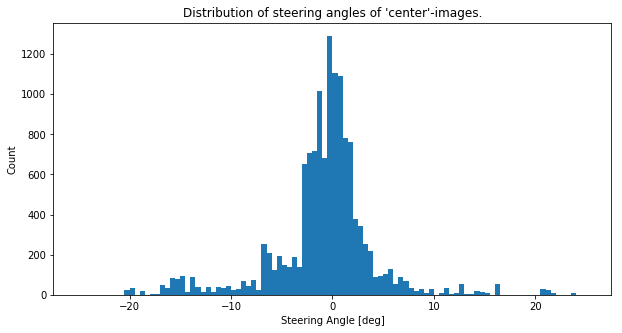

In [46]:
from matplotlib import pyplot as plt

nb_bins = 100

reader = model.FileReaderCarSim(driving_log, pictures=['center',])

fig = plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(reader.drv_log.steer_angle*25, nb_bins,
                            range=(-25, 25), histtype="barstacked")

plt.title("Distribution of steering angles of 'center'-images.")
plt.xlabel('Steering Angle [deg]')
plt.ylabel('Count')
plt.savefig(filename='./illustrations/histogram_center_img.png')
plt.show()

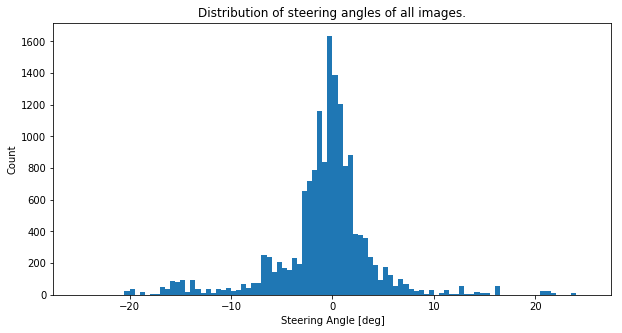

In [49]:
from matplotlib import pyplot as plt

nb_bins = 100

reader = generator.FileReaderCarSim(driving_log, pictures=['center', 'left', 'right'])

fig = plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(reader.drv_log.steer_angle*25, nb_bins,
                            range=(-25, 25), histtype="barstacked")

plt.title("Distribution of steering angles of all images.")
plt.xlabel('Steering Angle [deg]')
plt.ylabel('Count')
plt.savefig(filename='./illustrations/histogram_img.png')
plt.show()

In [ ]:
def show_samples(indices, images, labels, cmap=None, title=None):
    """
    This functions shows sample images in 5 columns and number of rows 
    adjusted according to number of samples. This function is capable of 
    showing RGB images and grayscale images and user need to define color 
    as 'gray' when grayscale images are shown.
    
    Parameters
    ----------
    indices : list
        List of sample indices which will be plotted. All the indices 
        must be found from the images set
    images : list
        4D list of images (N, height, width, channels)
    labels : list
        List of string labels which correspond the label of 'indices' 
    cmap : String
        Defines colol map
    title : string
        Title of the plot, shown above the pictures.

    """
    fig = plt.figure(figsize=(10, 8))
    fig.suptitle(title, fontsize=20, y=1.08)
    # i = is loop index; idx is sample index from "sample_indices"
    for i, idx in enumerate(indices):
        image = images[idx]
        a = fig.add_subplot(5, 5, i+1)
        if cmap == 'gray' or image.shape[2] == 1:
            # Force grayscale image, squeze() is needed to show grayscale images
            # with shape (x, y, 1)
            plt.imshow(image.squeeze(), cmap='gray')
        else:
            # Try defaults as no color map is given
            plt.imshow(image)
        a.set_title("index: " + str(idx) + "\nclass: " + str(labels[idx]))
    
    fig.tight_layout(w_pad=0.3, h_pad=0.5)

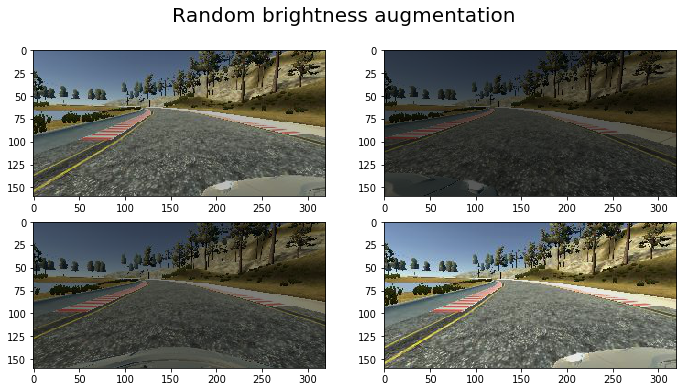

In [76]:
# This cell generates 4 images which have random brightness applied

# Visualizations will be shown in the notebook.
%matplotlib inline

from generator import GenFileReaderWrapper
from generator import GenRandBrightness

# Show few samples from the training set
reader = generator.FileReaderCarSim(driving_log, pictures=['center', 'left', 'right'])
indices = [1,2,3,4]
gen = GenFileReaderWrapper(reader,indices=indices, rollover=True)
gen = GenRandBrightness(gen, br_range=(0.2, 1.))


fig = plt.figure(figsize=(10, 5))
fig.suptitle("Random brightness augmentation", fontsize=20, y=1.08)
# i = is loop index; idx is sample index from "sample_indices"
for i, idx in enumerate(indices):
    tensor = next(gen)[0]
    #print(tensor[0].shape)
    a = fig.add_subplot(2, 2, i+1)
    plt.imshow(tensor[0])
    #a.set_title("image")

# Add little bit padding between subplots
fig.tight_layout(w_pad=0.3, h_pad=0.5)

# Save image with temporary filename. When you are satisfied with result you can copy image 
# to other name e.g. random_brightness_[date].png
plt.savefig(filename='./illustrations/random_brightness_temp.png')

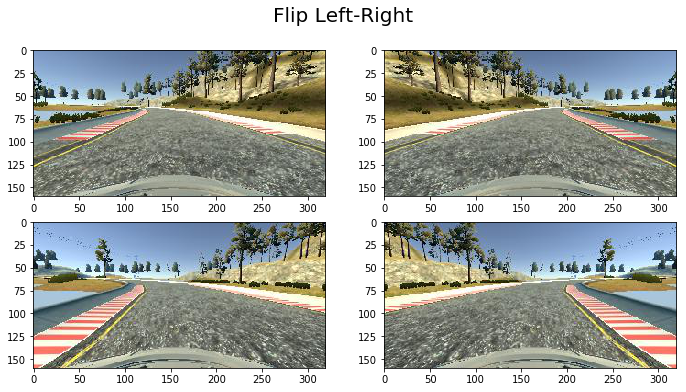

In [88]:
# This cell generates flipped images

# Visualizations will be shown in the notebook.
%matplotlib inline

from generator import GenFileReaderWrapper
from generator import GenFlipLR

# Show few samples from the training set
reader = generator.FileReaderCarSim(driving_log, pictures=['center'])
indices = [1, 1, 5150, 5150]
gen = GenFileReaderWrapper(reader,indices=indices, rollover=True)
gen = GenFlipLR(gen)

# Need to read first one out
next(gen)

fig = plt.figure(figsize=(10, 5))
fig.suptitle("Flip Left-Right", fontsize=20, y=1.08)
# i = is loop index; idx is sample index from "sample_indices"
for i, idx in enumerate(indices):
    tensor = next(gen)[0]
    #print(tensor[0].shape)
    a = fig.add_subplot(2, 2, i+1)
    plt.imshow(tensor[0])
    #a.set_title("image")

# Add little bit padding between subplots
fig.tight_layout(w_pad=0.3, h_pad=0.5)

# Save image with temporary filename. When you are satisfied with result you can copy image 
# to other name e.g. random_brightness_[date].png
plt.savefig(filename='./illustrations/fliplr_temp.png')

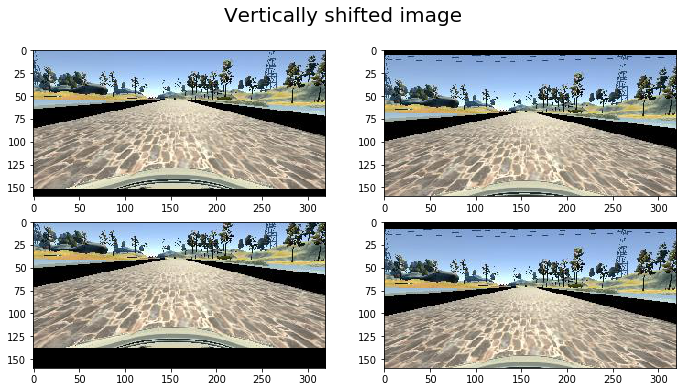

In [92]:
# This cell generates vertically shifted images

# Visualizations will be shown in the notebook.
%matplotlib inline

from generator import GenFileReaderWrapper
from generator import GenGaussVerticalShift

# Show few samples from the training set
reader = generator.FileReaderCarSim(driving_log, pictures=['center'])
indices = [500, 500, 10150, 10150]
gen = GenFileReaderWrapper(reader,indices=indices, rollover=True)
gen = GenGaussVerticalShift(gen, mu=0, sigma=8, multiplication=4)

# Need to read first one out
next(gen)

fig = plt.figure(figsize=(10, 5))
fig.suptitle("Vertically shifted image", fontsize=20, y=1.08)
# i = is loop index; idx is sample index from "sample_indices"
for i, idx in enumerate(indices):
    tensor = next(gen)[0]
    #print(tensor[0].shape)
    a = fig.add_subplot(2, 2, i+1)
    plt.imshow(tensor[0])
    #a.set_title("image")

# Add little bit padding between subplots
fig.tight_layout(w_pad=0.3, h_pad=0.5)

# Save image with temporary filename. When you are satisfied with result you can copy image 
# to other name e.g. random_brightness_[date].png
plt.savefig(filename='./illustrations/vertical_shift_temp.png')

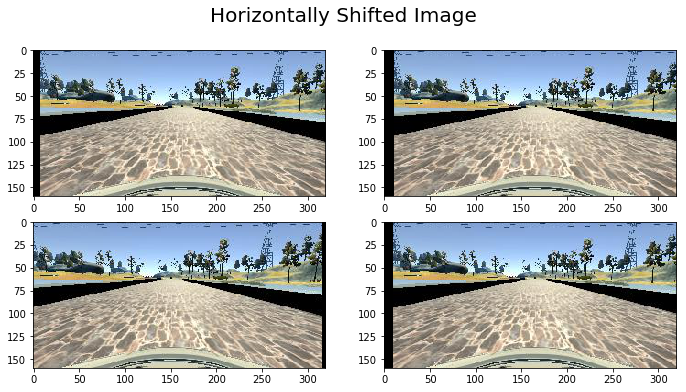

In [93]:
# This cell generates horizontally shifted images

# Visualizations will be shown in the notebook.
%matplotlib inline

from generator import GenFileReaderWrapper
from generator import GenRandHorizontalShift

# Show few samples from the training set
reader = generator.FileReaderCarSim(driving_log, pictures=['center'])
indices = [500, 500, 10150, 10150]
gen = GenFileReaderWrapper(reader,indices=indices, rollover=True)
gen = GenRandHorizontalShift(gen, shifts=(-15, 15), multiplication=4)

# Need to read first one out
next(gen)

fig = plt.figure(figsize=(10, 5))
fig.suptitle("Horizontally Shifted Image", fontsize=20, y=1.08)
# i = is loop index; idx is sample index from "sample_indices"
for i, idx in enumerate(indices):
    tensor = next(gen)[0]
    #print(tensor[0].shape)
    a = fig.add_subplot(2, 2, i+1)
    plt.imshow(tensor[0])
    #a.set_title("image")

# Add little bit padding between subplots
fig.tight_layout(w_pad=0.3, h_pad=0.5)

# Save image with temporary filename. When you are satisfied with result you can copy image 
# to other name e.g. random_brightness_[date].png
plt.savefig(filename='./illustrations/horizontal_shift_temp.png')

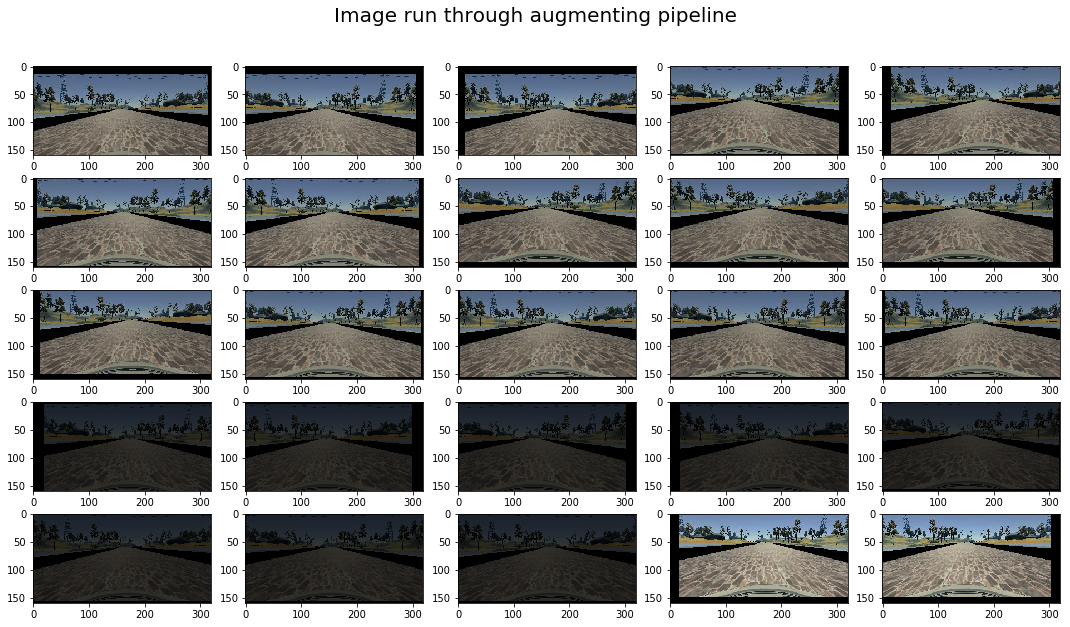

In [21]:
# This cell generates horizontally shifted images

# Visualizations will be shown in the notebook.
%matplotlib inline

from matplotlib import pyplot as plt
from generator import GenFileReaderWrapper, GenRandBrightness, GenGaussVerticalShift, GenRandHorizontalShift, GenFlipLR


# Show few samples from the training set
reader = generator.FileReaderCarSim(driving_log, pictures=['center'])
indices = [500]
gen = GenFileReaderWrapper(reader,indices=indices, rollover=True)
gen = GenRandBrightness(gen, br_range=(0.2, 1.))
gen = GenGaussVerticalShift(gen, mu=0, sigma=8, multiplication=2)
gen = GenRandHorizontalShift(gen, (-20, 20), multiplication=2, target_distance=50)
gen = GenFlipLR(gen)



# Need to read first one out
#next(gen)

fig = plt.figure(figsize=(15, 8))
fig.suptitle("Image run through augmenting pipeline", fontsize=20, y=1.08)
# i = is loop index; idx is sample index from "sample_indices"
for i in range(25):
    tensor = next(gen)[0]
    #print(tensor[0].shape)
    a = fig.add_subplot(5, 5, i+1)
    plt.imshow(tensor[0])
    #a.set_title("image")

# Add little bit padding between subplots
fig.tight_layout(w_pad=0.3, h_pad=0.5)

# Save image with temporary filename. When you are satisfied with result you can copy image 
# to other name e.g. random_brightness_[date].png
plt.savefig(filename='./illustrations/augment_pipeline_temp.png')